# **Task 28-> Exploring Cross-Validation, Overfitting, and Underfitting**


## **Cross Valdation** 
it is resembling tecnique that helps in estimating how well the model will perform on an independent dataset

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, LeaveOneOut, GroupKFold, ShuffleSplit, cross_val_score
import numpy as np

digits = load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.3, random_state=42)


## **Defining Logestic Regression, SVM, Random Forest**

In [32]:
models = {
    'Logistic Regression': LogisticRegression(solver='liblinear', multi_class='ovr'),
    'SVM': SVC(gamma='auto'),
    'Random Forest': RandomForestClassifier(n_estimators=40)
}

## **Helper function to evaluate models**

In [33]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

## **Train and evaluate models without cross-validation**

In [34]:
print("Train and evaluate models without cross-validation:")
for model_name, model in models.items():
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    print(f"{model_name} score: {score}")


Train and evaluate models without cross-validation:
Logistic Regression score: 0.9537037037037037
SVM score: 0.3925925925925926
Random Forest score: 0.9722222222222222


## **1. K-Fold Cross-Validation**

### **Description**
K-Fold Cross-Validation is a model evaluation technique used to assess the performance and generalizability of a machine learning model. It involves partitioning the dataset into `k` equal-sized folds. The model is trained on `k-1` folds and tested on the remaining fold. This process is repeated `k` times, with each fold serving as the test set exactly once. The results are then averaged to provide a more reliable estimate of the model's performance.

### **Concept**
There is no specific formula for K-Fold Cross-Validation, but the general process can be described as:

1. **Divide the dataset into `k` folds.**
2. **For each fold `i` (from 1 to `k`):**
   - **Train the model using `k-1` folds (excluding fold `i`).**
   - **Test the model on fold `i`.**
   - **Record the performance metric.**
3. **Calculate the average performance metric across all `k` folds.**

### **Parameters**
- **`k`**: Number of folds into which the dataset is divided. Common values are 5 or 10, but it can be set according to the size of the dataset and the computational resources available.

### **Returns**
- **Performance Metric**: The averaged performance metric (e.g., accuracy, precision, recall, F1-score) obtained from each fold. This metric provides an estimate of the model's generalization ability.


In [35]:
kf = KFold(n_splits=3)
print("\nK-Fold Cross-Validation:")
for model_name, model in models.items():
    scores = []
    for train_index, test_index in kf.split(digits.data):
        X_train_kf, X_test_kf = digits.data[train_index], digits.data[test_index]
        y_train_kf, y_test_kf = digits.target[train_index], digits.target[test_index]
        scores.append(get_score(model, X_train_kf, X_test_kf, y_train_kf, y_test_kf))
    print(f"{model_name} scores: {scores}")


K-Fold Cross-Validation:
Logistic Regression scores: [0.8964941569282137, 0.9515859766277128, 0.9115191986644408]
SVM scores: [0.41068447412353926, 0.41569282136894825, 0.4273789649415693]
Random Forest scores: [0.9115191986644408, 0.9482470784641068, 0.9215358931552587]


## **2. Stratified K-Fold Cross-Validation**

### **Description**
Stratified K-Fold Cross-Validation is a variation of K-Fold Cross-Validation that ensures each fold of the dataset is representative of the overall distribution of the target variable. This technique is particularly useful for classification problems where the target variable has imbalanced classes. By maintaining the proportion of each class in each fold, Stratified K-Fold helps ensure that each fold is a good representative of the whole dataset, leading to more reliable and stable performance estimates.

### **Concept**
The process of Stratified K-Fold Cross-Validation can be described as follows:

1. **Divide the dataset into `k` folds while preserving the proportion of each class in each fold.**
2. **For each fold `i` (from 1 to `k`):**
   - **Train the model using `k-1` folds (excluding fold `i`).**
   - **Test the model on fold `i`.**
   - **Record the performance metric.**
3. **Calculate the average performance metric across all `k` folds.**

### **Parameters**
- **`k`**: Number of folds into which the dataset is divided. Common values are 5 or 10.
- **`target variable`**: The categorical variable whose distribution is preserved in each fold.

### **Returns**
- **Performance Metric**: The averaged performance metric (e.g., accuracy, precision, recall, F1-score) obtained from each fold. This metric provides an estimate of the model's generalization ability while accounting for class imbalance.



In [36]:
skf = StratifiedKFold(n_splits=3)
print("\nStratified K-Fold Cross-Validation:")
for model_name, model in models.items():
    scores = []
    for train_index, test_index in skf.split(digits.data, digits.target):
        X_train_skf, X_test_skf = digits.data[train_index], digits.data[test_index]
        y_train_skf, y_test_skf = digits.target[train_index], digits.target[test_index]
        scores.append(get_score(model, X_train_skf, X_test_skf, y_train_skf, y_test_skf))
    print(f"{model_name} scores: {scores}")


Stratified K-Fold Cross-Validation:
Logistic Regression scores: [0.8948247078464107, 0.9532554257095158, 0.9098497495826378]
SVM scores: [0.3806343906510851, 0.41068447412353926, 0.5125208681135225]
Random Forest scores: [0.9248747913188647, 0.9532554257095158, 0.9165275459098498]


## **3. Leave-One-Out Cross-Validation (LOOCV)**

### **Description**
Leave-One-Out Cross-Validation (LOOCV) is a special case of K-Fold Cross-Validation where the number of folds `k` is equal to the number of samples in the dataset. In LOOCV, each individual data point serves as a test set exactly once, while the remaining data points are used for training. This approach provides a thorough evaluation of the model by using each sample for testing and all other samples for training, which helps in assessing the model's performance with minimal bias.

### **Concpet**
The process of LOOCV can be described as:

1. **For each data point `i` (from 1 to `n` where `n` is the number of samples):**
   - **Use the data point `i` as the test set.**
   - **Use the remaining `n-1` data points as the training set.**
   - **Train the model on the training set and test it on the test set.**
   - **Record the performance metric for this iteration.**
2. **Calculate the average performance metric across all `n` iterations.**

### **Parameters**
- **`n`**: Number of samples in the dataset. LOOCV uses each sample as a test set exactly once.

### **Returns**
- **Performance Metric**: The averaged performance metric (e.g., accuracy, precision, recall, F1-score) obtained from each iteration. This provides a highly detailed evaluation of the model's performance.



In [37]:
loo = LeaveOneOut()
print("\nLeave-One-Out Cross-Validation:")
for model_name, model in models.items():
    scores = cross_val_score(model, digits.data, digits.target, cv=loo)
    average_score = np.mean(scores)
    print(f"{model_name} average score: {average_score}")


Leave-One-Out Cross-Validation:
Logistic Regression average score: 0.9643850862548692
SVM average score: 0.5971062882582081
Random Forest average score: 0.9799666110183639


## **4. Group K-Fold Cross-Validation**

### **Description**
Group K-Fold Cross-Validation is a variation of K-Fold Cross-Validation that is used when you have data where samples are grouped in a way that should not be split across training and test sets. This method ensures that all samples from a particular group appear in either the training set or the test set, but not both. This is particularly useful in situations where the data might be grouped by some attribute (e.g., patients in medical studies) and you want to avoid having samples from the same group in both training and testing phases.

### **Concept**
The process of Group K-Fold Cross-Validation can be described as:

1. **Divide the data into `k` groups, ensuring that each group is used as a whole in either the training or test set.**
2. **For each fold `i` (from 1 to `k`):**
   - **Use `k-1` groups for training.**
   - **Use the remaining group for testing.**
   - **Record the performance metric for this fold.**
3. **Calculate the average performance metric across all `k` folds.**

### **Parameters**
- **`k`**: Number of folds into which the dataset is divided.
- **`groups`**: An array or list indicating the group membership of each sample.

### **Returns**
- **Performance Metric**: The averaged performance metric (e.g., accuracy, precision, recall, F1-score) obtained from each fold. This provides a reliable estimate of the model’s performance while respecting group boundaries.



In [54]:
groups = np.random.randint(0, 10, size=digits.data.shape[0])
group_kf = GroupKFold(n_splits=3)

print("\nGroup K-Fold Cross-Validation:")
for model_name, model in models.items():
    scores = []
    for train_index, test_index in group_kf.split(digits.data, digits.target, groups):
        X_train_gkf, X_test_gkf = digits.data[train_index], digits.data[test_index]
        y_train_gkf, y_test_gkf = digits.target[train_index], digits.target[test_index]
        scores.append(get_score(model, X_train_gkf, X_test_gkf, y_train_gkf, y_test_gkf))
    print(f"{model_name} scores: {scores}")


Group K-Fold Cross-Validation:
Logistic Regression scores: [0.9558404558404558, 0.9562841530054644, 0.9523809523809523]
SVM scores: [0.33618233618233617, 0.46265938069216755, 0.47985347985347987]
Random Forest scores: [0.9629629629629629, 0.9726775956284153, 0.967032967032967]


## **5. Shuffle Split Cross-Validation**

### **Description**
Shuffle Split Cross-Validation is a cross-validation technique that randomly splits the dataset into training and test sets multiple times. Unlike K-Fold Cross-Validation, where the data is divided into fixed folds, Shuffle Split allows for a customizable number of iterations and train-test splits. This method provides flexibility and can help in evaluating the model's performance across different random splits of the dataset.

### **Concept**
The process of Shuffle Split Cross-Validation can be described as:

1. **Randomly shuffle the dataset.**
2. **For each iteration `i` (from 1 to `n`):**
   - **Split the dataset into a training set and a test set according to the specified proportions.**
   - **Train the model on the training set and evaluate it on the test set.**
   - **Record the performance metric for this iteration.**
3. **Calculate the average performance metric across all iterations.**

### **Parameters**
- **`n_splits`**: Number of re-shuffling and splitting iterations. Each iteration provides a different train-test split.
- **`test_size`**: Proportion of the dataset to include in the test split. This can be a float (fraction of the dataset) or an integer (absolute number of test samples).
- **`train_size`**: Proportion of the dataset to include in the training split. This is optional if `test_size` is specified.

### **Returns**
- **Performance Metric**: The averaged performance metric (e.g., accuracy, precision, recall, F1-score) obtained from each iteration. This provides a comprehensive view of the model’s performance across different random splits.



In [55]:
shuffle_split = ShuffleSplit(n_splits=3, test_size=0.3, random_state=42)
print("\nShuffle Split Cross-Validation:")
for model_name, model in models.items():
    scores = []
    for train_index, test_index in shuffle_split.split(digits.data):
        X_train_ss, X_test_ss = digits.data[train_index], digits.data[test_index]
        y_train_ss, y_test_ss = digits.target[train_index], digits.target[test_index]
        scores.append(get_score(model, X_train_ss, X_test_ss, y_train_ss, y_test_ss))
    print(f"{model_name} scores: {scores}")


Shuffle Split Cross-Validation:
Logistic Regression scores: [0.9537037037037037, 0.9537037037037037, 0.9555555555555556]
SVM scores: [0.3925925925925926, 0.5, 0.34629629629629627]
Random Forest scores: [0.9703703703703703, 0.9703703703703703, 0.9555555555555556]


## **Using cross_val_score for consistency and convenience**

In [56]:
print("\nUsing cross_val_score for consistency:")
scores_logistic = cross_val_score(LogisticRegression(solver='liblinear', multi_class='ovr'), digits.data, digits.target, cv=3)
print(f"Logistic Regression scores: {scores_logistic}")
scores_svm = cross_val_score(SVC(gamma='auto'), digits.data, digits.target, cv=3)
print(f"SVM scores: {scores_svm}")
scores_rf = cross_val_score(RandomForestClassifier(n_estimators=40), digits.data, digits.target, cv=3)
print(f"Random Forest scores: {scores_rf}")


Using cross_val_score for consistency:
Logistic Regression scores: [0.89482471 0.95325543 0.90984975]
SVM scores: [0.38063439 0.41068447 0.51252087]
Random Forest scores: [0.92153589 0.95993322 0.92654424]


## **Parameter tuning using cross-validation**

In [57]:
print("\nParameter tuning using cross-validation:")

scores1 = cross_val_score(RandomForestClassifier(n_estimators=5), digits.data, digits.target, cv=10)
print(f"Random Forest (n_estimators=5) average score: {np.average(scores1)}")
scores2 = cross_val_score(RandomForestClassifier(n_estimators=20), digits.data, digits.target, cv=10)
print(f"Random Forest (n_estimators=20) average score: {np.average(scores2)}")
scores3 = cross_val_score(RandomForestClassifier(n_estimators=30), digits.data, digits.target, cv=10)
print(f"Random Forest (n_estimators=30) average score: {np.average(scores3)}")
scores4 = cross_val_score(RandomForestClassifier(n_estimators=40), digits.data, digits.target, cv=10)
print(f"Random Forest (n_estimators=40) average score: {np.average(scores4)}")



Parameter tuning using cross-validation:
Random Forest (n_estimators=5) average score: 0.8725791433891992
Random Forest (n_estimators=20) average score: 0.9359838609559279
Random Forest (n_estimators=30) average score: 0.9448975791433891
Random Forest (n_estimators=40) average score: 0.9415642458100558


# **Overfitting and Underfitting**

### **Overfitting**

**Description**: 
Overfitting occurs when a model learns not only the underlying pattern in the training data but also the noise and random fluctuations. This results in a model that performs very well on the training data but poorly on new, unseen data. Overfitting typically happens when the model is too complex relative to the amount of training data, or when the model is trained for too many epochs.

**Symptoms**:
- High accuracy on the training set but low accuracy on the validation or test set.
- The model captures noise or fluctuations in the training data as if they were part of the underlying pattern.

**Prevention Techniques**:
- **Simplify the Model**: Use a less complex model with fewer parameters.
- **Regularization**: Apply regularization techniques like L1 (Lasso) or L2 (Ridge) regularization to penalize large coefficients.
- **Early Stopping**: Stop training when the performance on a validation set starts to degrade.
- **Cross-Validation**: Use techniques like K-Fold Cross-Validation to ensure the model generalizes well to unseen data.
- **More Data**: Increase the amount of training data if possible.

**Example**:
In a polynomial regression example, using a high-degree polynomial might fit the training data very well but result in poor generalization to new data.

### **Underfitting**

**Description**: 
Underfitting occurs when a model is too simple to capture the underlying pattern in the data. This results in poor performance on both the training and validation sets. Underfitting typically happens when the model lacks complexity or capacity to learn the data's intricacies.

**Symptoms**:
- Poor accuracy on both the training and test sets.
- The model fails to capture the underlying trend or pattern in the data.

**Prevention Techniques**:
- **Increase Model Complexity**: Use a more complex model or add more features.
- **Reduce Regularization**: Decrease the regularization strength if it is too high.
- **Feature Engineering**: Create new features or use polynomial features to capture more complex patterns in the data.



In [58]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
import numpy as np
from sklearn.model_selection import validation_curve
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
np.random.seed(0)
plt.style.use('ggplot')

In [59]:
iris = load_iris()
X, y = iris.data, iris.target
print(X[:5])
print(y[:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]


### **Here we use KFolds cross-validation with 20 folds**

### **(K=20) to evaluate the generalization efficiency of the model**

### **Within each fold we will then estimate the training and test error**

### **using the training and test sets respectively**


In [60]:
kf = KFold(n_splits=20)
list_training_error = []
list_testing_error = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model = MLPRegressor() 
    model.fit(X_train, y_train)
    
    y_train_data_pred = model.predict(X_train)
    y_test_data_pred = model.predict(X_test)
    
    fold_training_error = mean_absolute_error(y_train, y_train_data_pred)
    fold_testing_error = mean_absolute_error(y_test, y_test_data_pred)
    
    list_training_error.append(fold_training_error)
    list_testing_error.append(fold_testing_error)


### **Plot the mean absolute error (MAE) of the training phase and the MAE of the testing phase:**

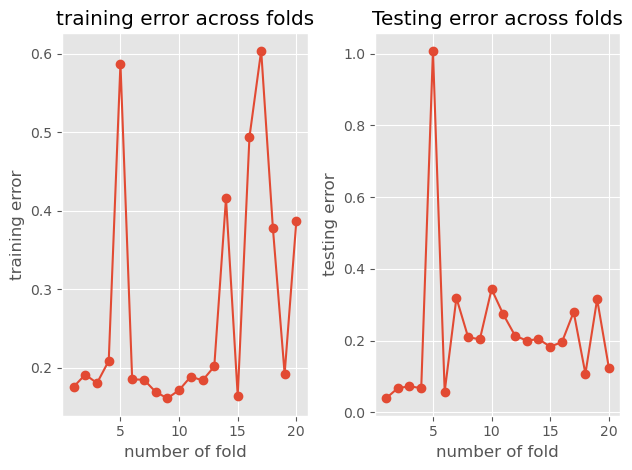

In [61]:
 plt.subplot(1,2,1)
plt.plot(range(1, kf.get_n_splits() + 1), np.array(list_training_error).ravel(), 'o-')
plt.xlabel('number of fold')
plt.ylabel('training error')
plt.title('training error across folds')
plt.tight_layout()
plt.subplot(1,2,2)
plt.plot(range(1, kf.get_n_splits() + 1), np.array(list_testing_error).ravel(), 'o-')
plt.xlabel('number of fold')
plt.ylabel('testing error')
plt.title('Testing error across folds')
plt.tight_layout()
plt.show()


### **Learning Curve**

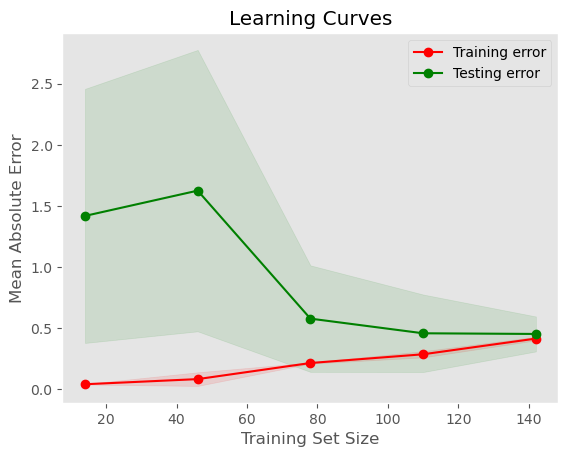

In [62]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    MLPRegressor(hidden_layer_sizes=(10,), max_iter=500, random_state=0),
    X, y, cv=kf, scoring='neg_mean_absolute_error', n_jobs=-1
)

train_mean = -np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = -np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure()
plt.plot(train_sizes, train_mean, 'o-', color='r', label='Training error')
plt.plot(train_sizes, test_mean, 'o-', color='g', label='Testing error')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='r', alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='g', alpha=0.1)
plt.xlabel('Training Set Size')
plt.ylabel('Mean Absolute Error')
plt.title('Learning Curves')
plt.legend(loc='best')
plt.grid()
plt.show()


### **Adjusting Model Complexity**
### **a. For Underfitting:**

In [63]:
model = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000)

### **Feature Engineering:** 

In [64]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)


### **b. For Overfitting:**

In [65]:
model = MLPRegressor(alpha=0.01, max_iter=1000)

### **Reduce Model Complexity: Use fewer layers or neurons**.

In [66]:
model = MLPRegressor(hidden_layer_sizes=(50,), max_iter=1000)

### **Early Stopping**

In [67]:
from sklearn.neural_network import MLPRegressor
model = MLPRegressor(hidden_layer_sizes=(50,), early_stopping=True, validation_fraction=0.1, n_iter_no_change=10)

### **Using Validation Curves**

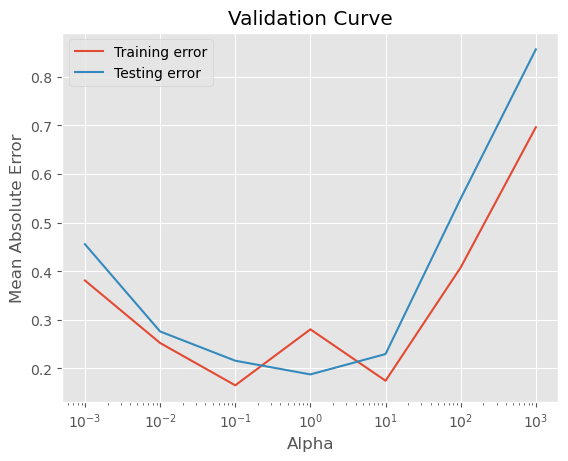

In [68]:
from sklearn.model_selection import validation_curve
param_range = np.logspace(-3, 3, 7)
train_scores, test_scores = validation_curve(
    MLPRegressor(max_iter=5000), X, y, param_name='alpha', param_range=param_range, cv=5, scoring='neg_mean_absolute_error')

plt.plot(param_range, -np.mean(train_scores, axis=1), label='Training error')
plt.plot(param_range, -np.mean(test_scores, axis=1), label='Testing error')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Mean Absolute Error')
plt.title('Validation Curve')
plt.legend()
plt.show()
